# Some other examples with pandas

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv('clementinum.csv')
df.head(10)

,year,month,day,avg,max,min,prec
0,1920,1,1,1.5,3.5,0.5,0.7
1,1920,1,2,0.9,1.6,0.5,2.2
2,1920,1,3,-4.1,0.5,-6.5,0.0
3,1920,1,4,-1.8,-0.8,-6.3,1.8
4,1920,1,5,-1.9,-0.3,-2.9,0.0
5,1920,1,6,-0.6,4.5,-5.2,0.0
6,1920,1,7,2.2,3.3,1.2,0.0
7,1920,1,8,3.2,4.0,1.4,0.4
8,1920,1,9,1.8,4.6,0.0,3.8
9,1920,1,10,3.2,5.5,-1.2,0.9


In [3]:
df.index = pd.to_datetime(df[['year', 'month', 'day']])

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 36525 entries, 1920-01-01 to 2019-12-31
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    36525 non-null  int64  
 1   month   36525 non-null  int64  
 2   day     36525 non-null  int64  
 3   avg     36525 non-null  float64
 4   max     36525 non-null  float64
 5   min     36525 non-null  float64
 6   prec    36525 non-null  float64
dtypes: float64(4), int64(3)
memory usage: 2.2 MB


In [5]:
df.head(10)

,year,month,day,avg,max,min,prec
1920-01-01,1920,1,1,1.5,3.5,0.5,0.7
1920-01-02,1920,1,2,0.9,1.6,0.5,2.2
1920-01-03,1920,1,3,-4.1,0.5,-6.5,0.0
1920-01-04,1920,1,4,-1.8,-0.8,-6.3,1.8
1920-01-05,1920,1,5,-1.9,-0.3,-2.9,0.0
1920-01-06,1920,1,6,-0.6,4.5,-5.2,0.0
1920-01-07,1920,1,7,2.2,3.3,1.2,0.0
1920-01-08,1920,1,8,3.2,4.0,1.4,0.4
1920-01-09,1920,1,9,1.8,4.6,0.0,3.8
1920-01-10,1920,1,10,3.2,5.5,-1.2,0.9


In [6]:
df.tail()

,year,month,day,avg,max,min,prec
2019-12-27,2019,12,27,3.9,5.6,3.5,0.0
2019-12-28,2019,12,28,1.7,3.6,1.4,0.0
2019-12-29,2019,12,29,0.4,2.4,0.1,0.0
2019-12-30,2019,12,30,3.3,5.9,-1.5,0.0
2019-12-31,2019,12,31,5.9,7.9,1.8,0.0


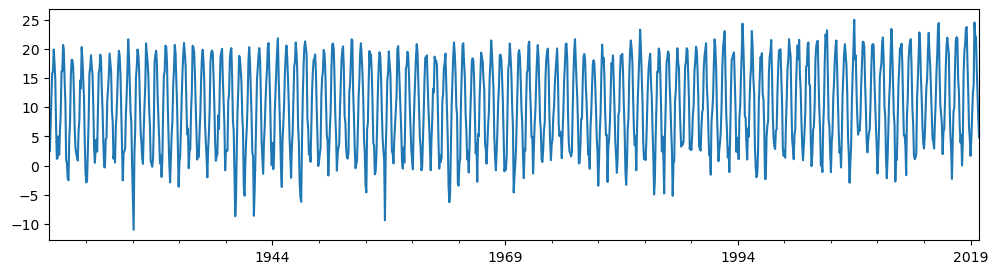

In [7]:
df['avg'].resample('M').mean().plot(figsize=(12,3));

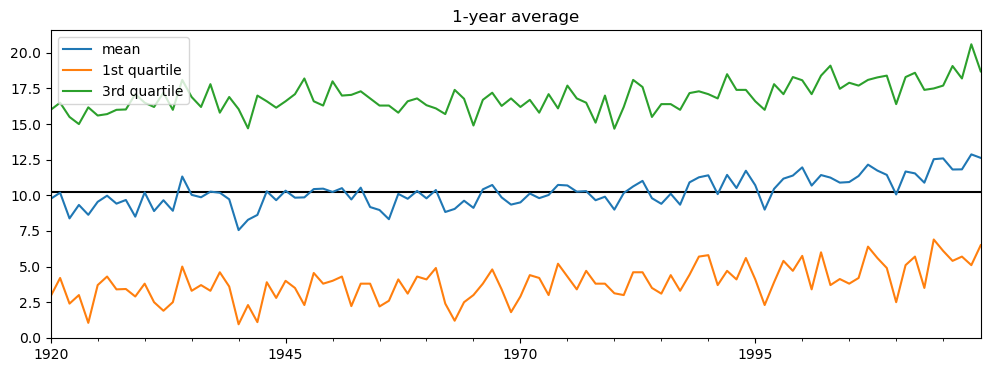

In [8]:
df['avg'].resample('Y').mean().plot(label='mean', figsize=(12, 4))
df['avg'].resample('Y').quantile(0.25).plot(label='1st quartile')
df['avg'].resample('Y').quantile(0.75).plot(label='3rd quartile')
plt.axhline(df['avg'].mean(), color='k', zorder=-1)
plt.title('1-year average')
plt.legend();

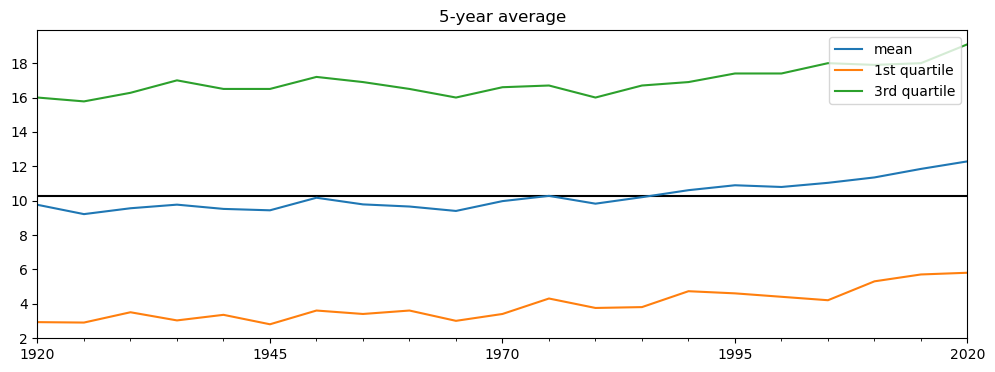

In [9]:
df['avg'].resample('5Y').mean().plot(label='mean', figsize=(12,4))
df['avg'].resample('5Y').quantile(0.25).plot(label='1st quartile')
df['avg'].resample('5Y').quantile(0.75).plot(label='3rd quartile')
plt.axhline(df['avg'].mean(), color='k', zorder=-1)
plt.title('5-year average')
plt.legend();

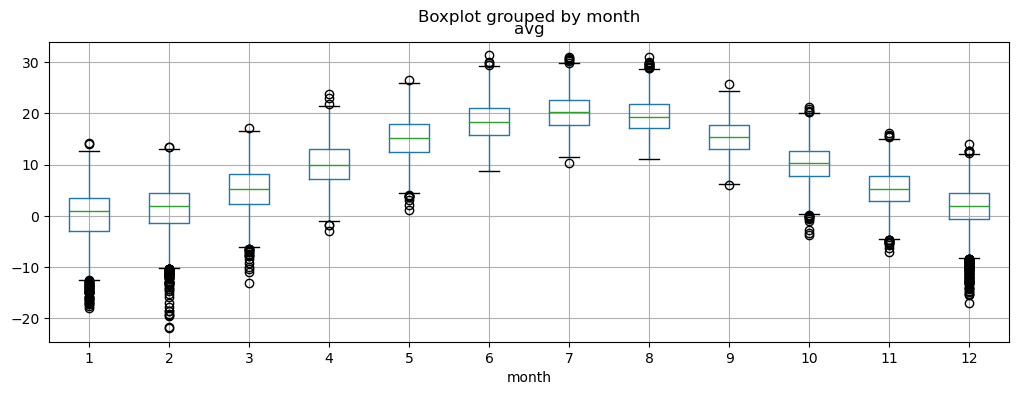

In [10]:
df.boxplot(column='avg', by='month', figsize=(12,4));

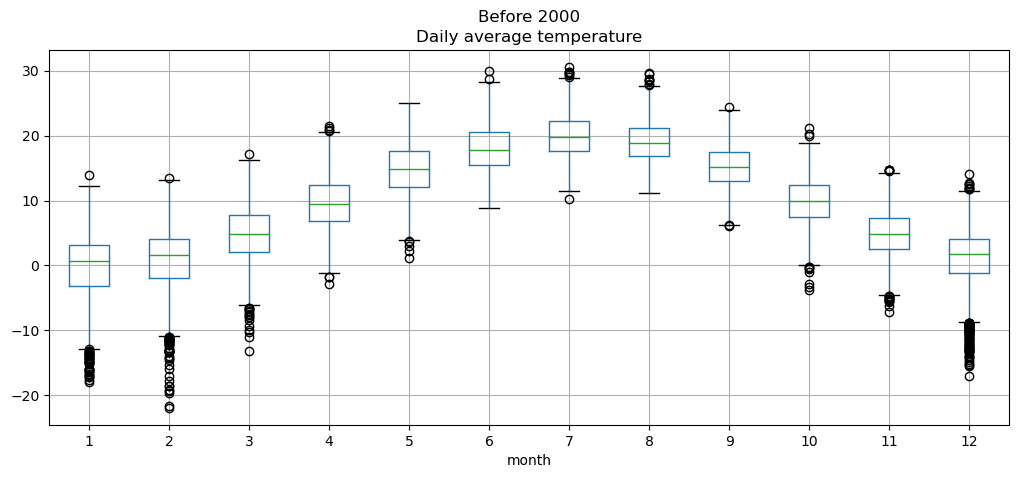

In [11]:
df[df.year<2000].boxplot(column='avg', by='month', figsize=(12,5))
plt.title('Daily average temperature')
plt.suptitle('Before 2000');

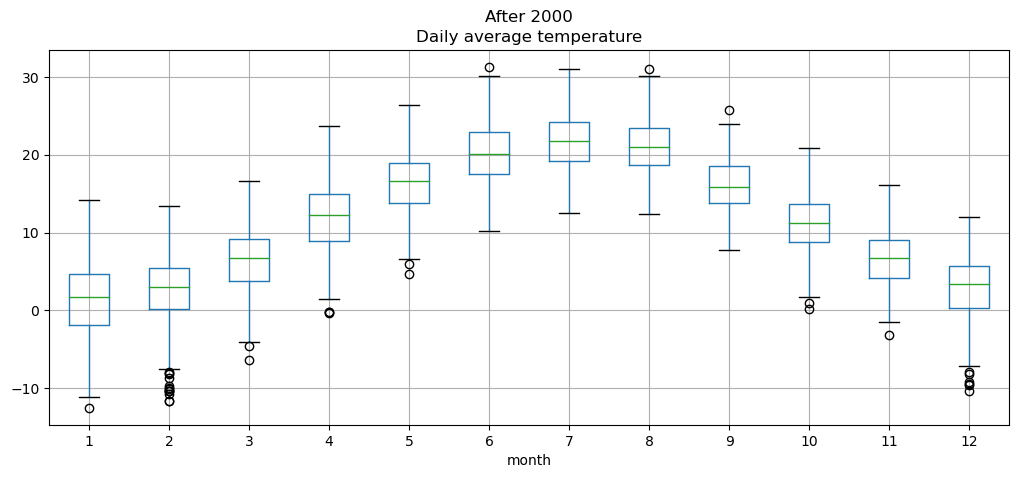

In [12]:
df[df.year>=2000].boxplot(column='avg', by='month', figsize=(12,5))
plt.title('Daily average temperature')
plt.suptitle('After 2000');

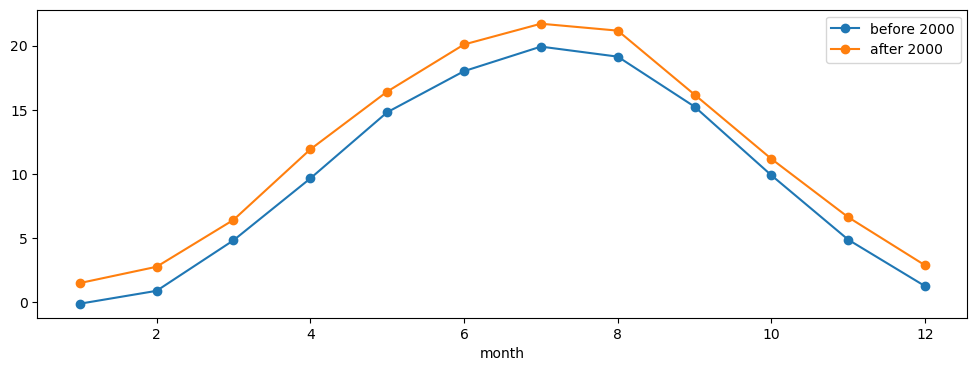

In [13]:
df[df.year<2000].groupby('month')['avg'].mean().plot(marker='o', label='before 2000', figsize=(12,4))
df[df.year>=2000].groupby('month')['avg'].mean().plot(marker='o', label='after 2000')
plt.legend();

In [14]:
df.loc['1972-06-08':'1972-06-14']

,year,month,day,avg,max,min,prec
1972-06-08,1972,6,8,17.5,20.4,15.8,0.0
1972-06-09,1972,6,9,17.8,20.7,10.9,3.6
1972-06-10,1972,6,10,17.3,21.4,13.2,9.7
1972-06-11,1972,6,11,16.6,19.9,13.6,0.1
1972-06-12,1972,6,12,17.8,24.1,14.8,11.0
1972-06-13,1972,6,13,14.6,17.9,13.1,0.0
1972-06-14,1972,6,14,14.6,18.3,12.2,0.4


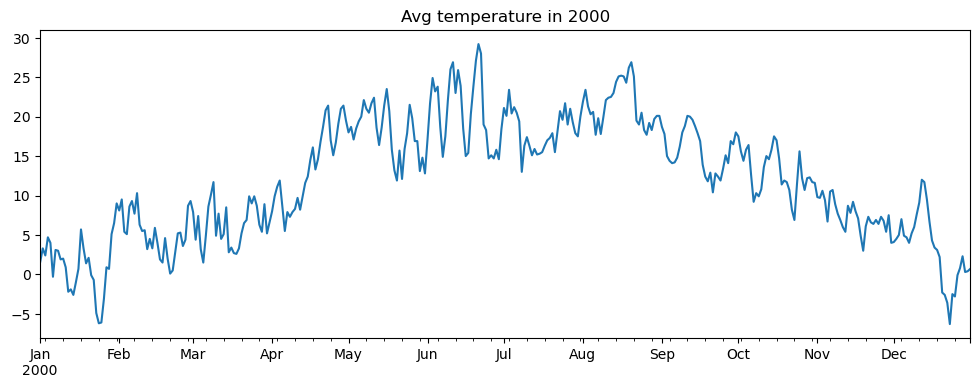

In [15]:
df[df['year'] == 2000]['avg'].plot(figsize=(12,4), title='Avg temperature in 2000');

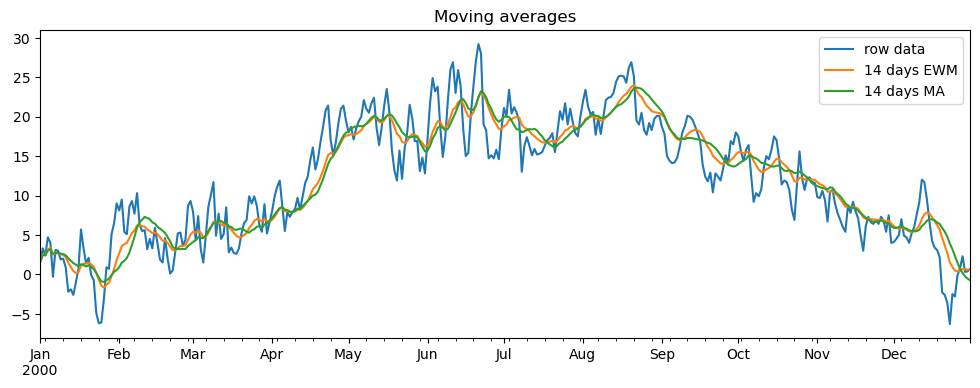

In [16]:
df[df['year'] == 2000]['avg'].plot(label='row data', figsize=(12,4), title='Moving averages')
df[df['year'] == 2000]['avg'].ewm(span=14).mean().plot(label='14 days EWM')
df[df['year'] == 2000]['avg'].rolling('14D').mean().plot(label='14 days MA')
plt.legend();